In [142]:
# основные библиотеки
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

# разделение датасета на для обучения
from sklearn.model_selection import train_test_split

# модели обучения
from sklearn.linear_model import LinearRegression as LRegression
from sklearn.preprocessing import StandardScaler as StScaler

# метрики качества модели
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [143]:
# качаем датасет с кегла
od.download('https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho')

Skipping, found downloaded files in ".\vehicle-dataset-from-cardekho" (use force=True to force download)


In [144]:
df_car_data = pd.read_csv('vehicle-dataset-from-cardekho/car data.csv')

In [145]:
# смротим что тут в первом датасете
# 300 строк х 9 столбцов
# пропусков нет
# аномалий в данных тоже нет
# есть количественные признаки (год, количество владельцев), вещественные (цена, пробег) и категориальные (тип двигателя, продавец, тим трансмиссии
# пока не понятно нужен ли признак - марка. так то он влияет на цену но сколько их и как перевести в цисловой признак ?
df_car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [146]:
df_car_data.shape

(301, 9)

In [147]:
df_car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [148]:
# посмотрим какие уникальные значения есть в количестенных и категориальных признаках
# ну с маркой машин вряд ли что то можно придумать с заменой на числовой признак
df_car_data[['Car_Name','Year','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']].agg(['unique']).values.tolist()

[[array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
         's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
         '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
         'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
         'camry', 'land cruiser', 'Royal Enfield Thunder 500',
         'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
         'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
         'Royal Enfield Thunder 350', 'KTM 390 Duke ',
         'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
         'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
         'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
         'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
         'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
         'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
         'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',

In [149]:
# прощай столбец с марками авто
df_car_data.drop(columns='Car_Name', inplace=True)

In [150]:
# ну тепрь красота
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


Text(0.5, 1.0, 'Distribution of Price')

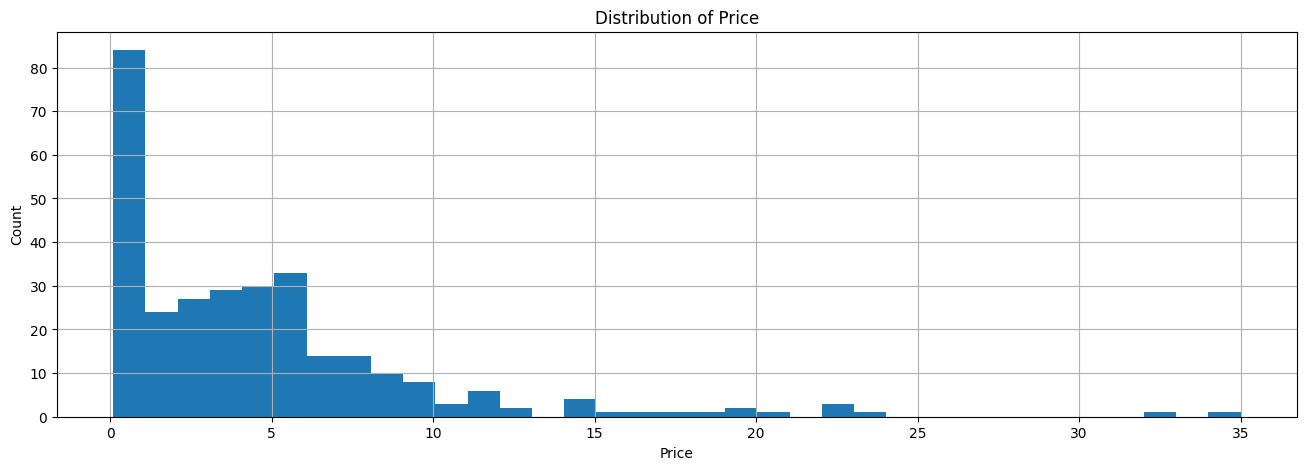

In [151]:
# чуток поизучаем данные
# цены тут вероятно в долларах и больше всего машин с ценой около 1000-2000 уе - 30%
plt.figure(figsize=(16,5))
df_car_data.Selling_Price.hist(bins=35)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')

<Axes: xlabel='Fuel_Type', ylabel='count'>

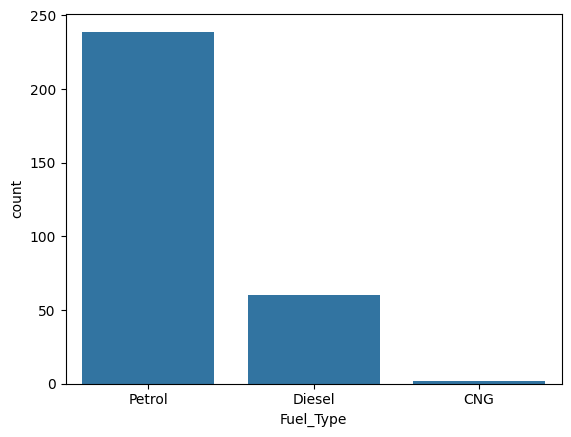

In [152]:
sns.countplot(x='Fuel_Type', data=df_car_data)

<Axes: xlabel='Seller_Type', ylabel='count'>

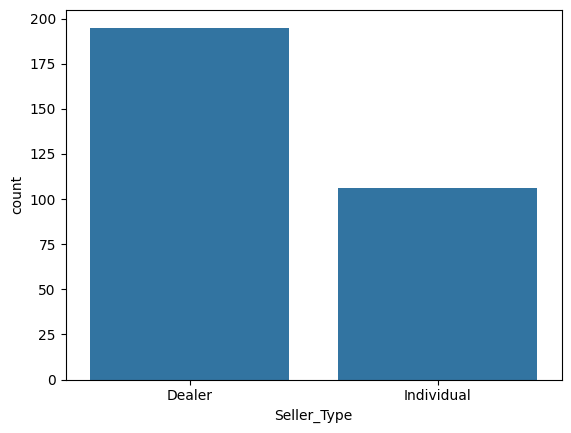

In [153]:
sns.countplot(x='Seller_Type', data=df_car_data)

<Axes: xlabel='Transmission', ylabel='count'>

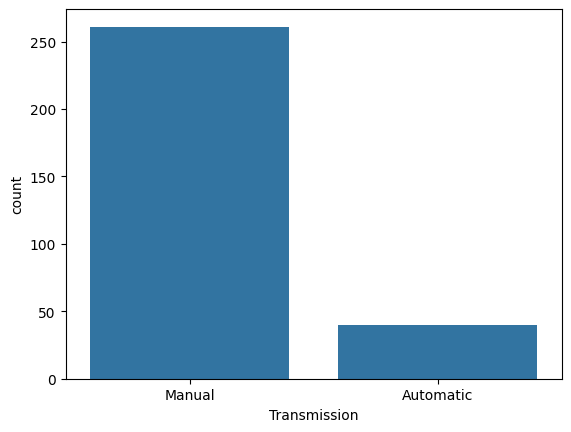

In [154]:
sns.countplot(x='Transmission', data=df_car_data)

<Axes: xlabel='Owner', ylabel='count'>

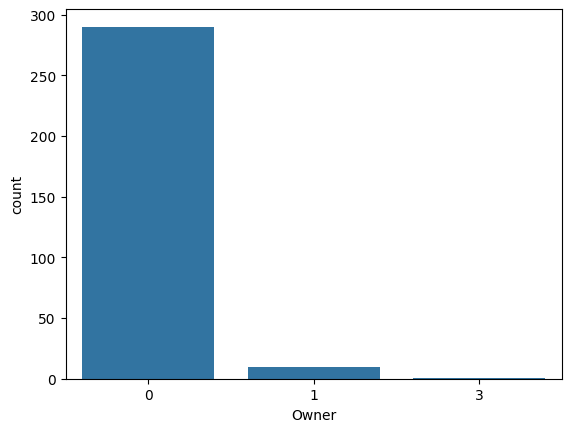

In [155]:
# очень много авто у которых нет предыдущих владельцев
sns.countplot(x='Owner', data=df_car_data)

In [156]:
df_car_data[df_car_data['Owner']==0].Year.value_counts()

Year
2015    60
2016    49
2014    36
2017    35
2013    32
2012    22
2011    18
2010    14
2008     6
2009     6
2005     4
2006     3
2003     2
2018     1
2004     1
2007     1
Name: count, dtype: int64

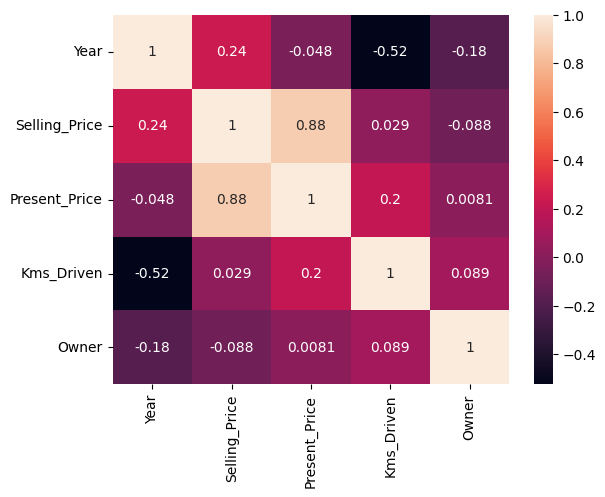

In [157]:
# какая корреляция между признаками сейчас
corr = df_car_data.select_dtypes(['int64','Float64']).corr()
sns.heatmap(corr, linecolor='white', annot=True);

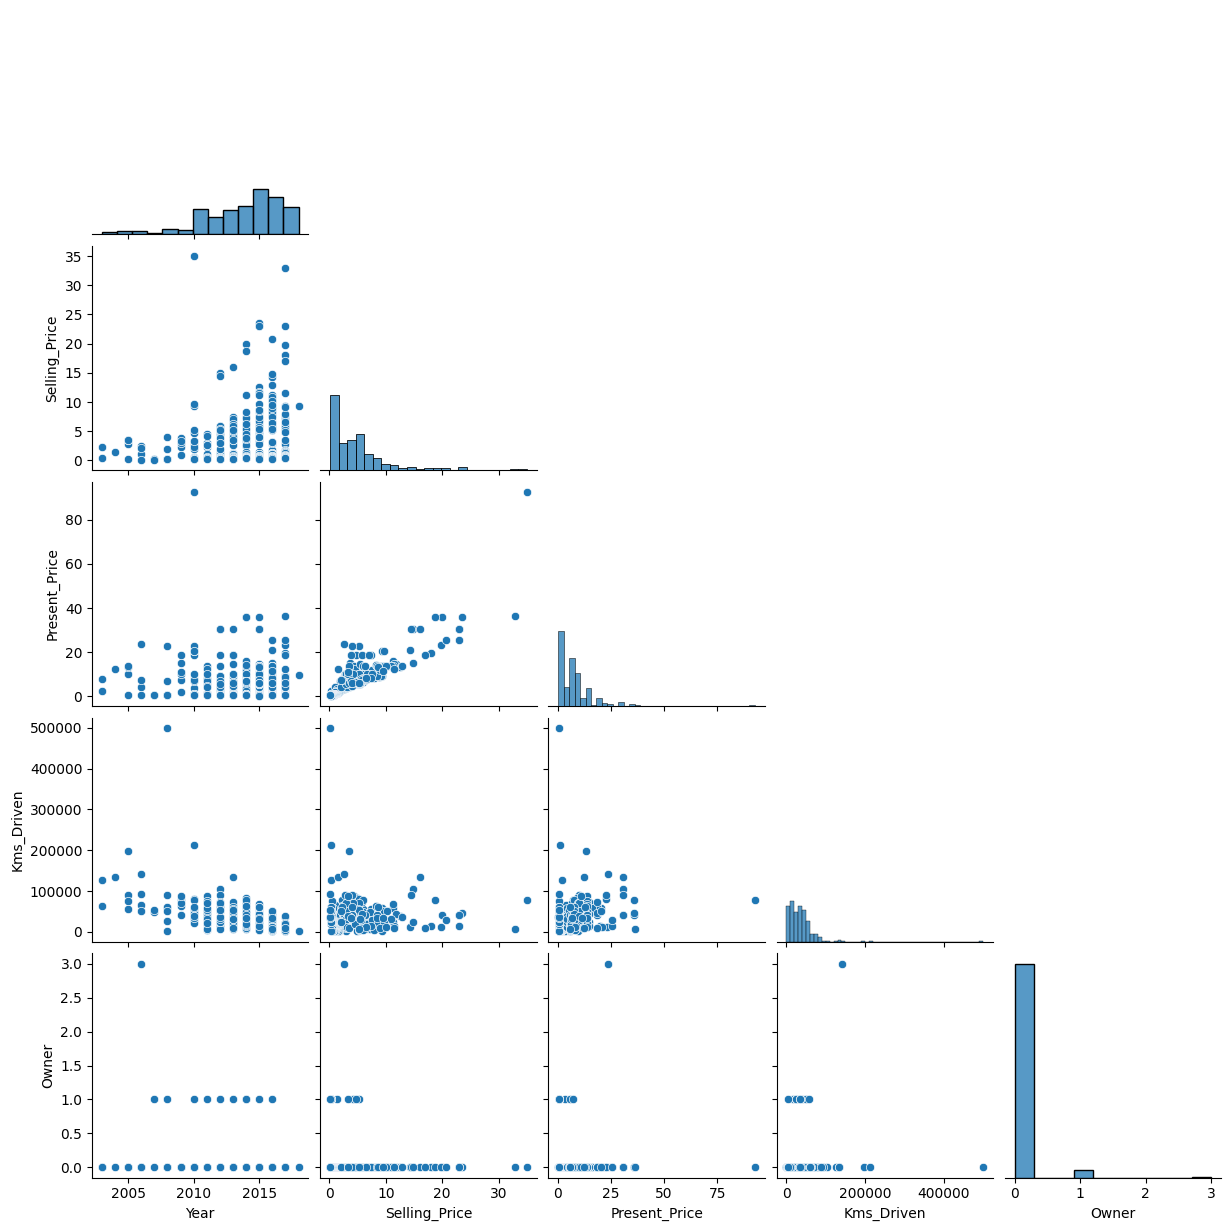

In [158]:
sns.pairplot(df_car_data, corner=True);

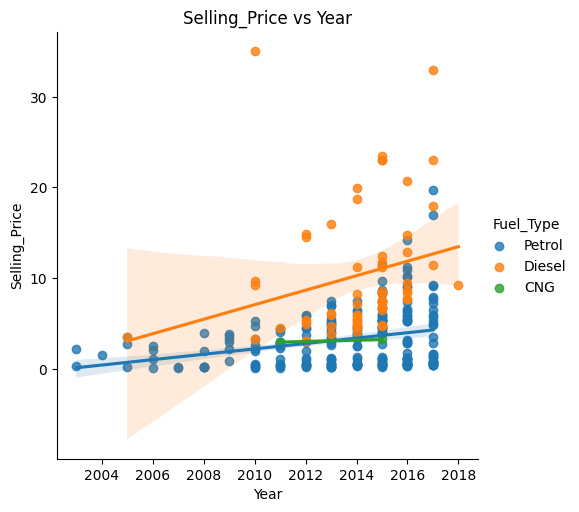

In [159]:
# посмотрим какая есть зависимость у цены продажи и года выпуска в зависимости от типа двигателя 
sns.lmplot(x='Year', y='Selling_Price', data=df_car_data, hue='Fuel_Type')
plt.title('Selling_Price vs Year');

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

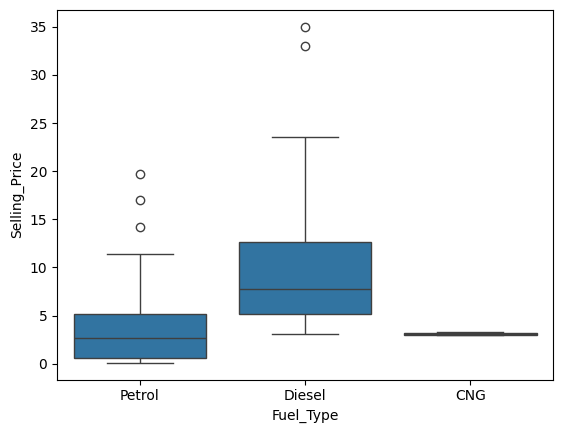

In [160]:
# посмотрим как распределена цена продажи в зависимости от типа топлива
# в общем CNG настолько мало машин что для анализа никакого вляния не окажут
# медианная цена для бензина и двигателя существенно отличаются и в принципе дизельные двигатели дороже
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df_car_data)

<Axes: xlabel='Year', ylabel='Selling_Price'>

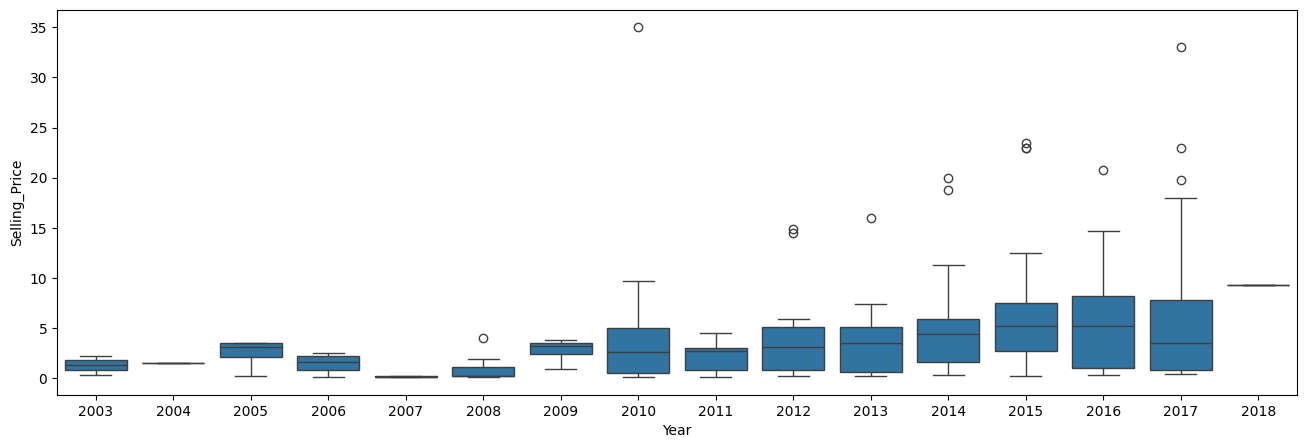

In [161]:
# в зависимости от года медианная цена где то с 2010г до 2017г. +/- на одном уровне, там и мишин больше
# но в 2017г почему то медианная цена ниже чем в в предыдущие года
plt.figure(figsize=(16,5))
sns.boxplot(x="Year", y="Selling_Price", data=df_car_data)

<Axes: >

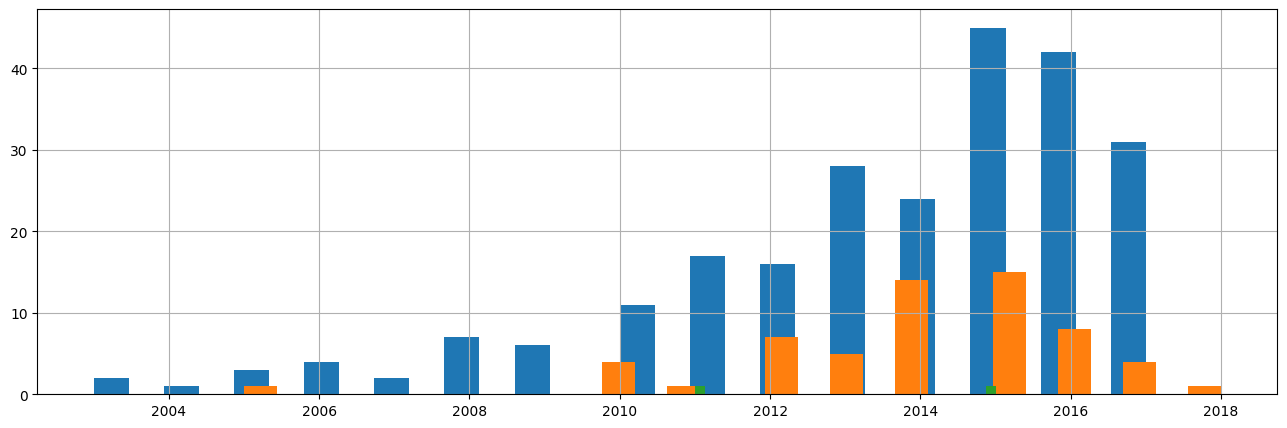

In [162]:
# количество автомобилей по годам в зависимости от типа топлива
plt.figure(figsize=(16,5))
df_car_data[df_car_data['Fuel_Type']=='Petrol'].Year.hist(bins=30)
df_car_data[df_car_data['Fuel_Type']=='Diesel'].Year.hist(bins=30)
df_car_data[df_car_data['Fuel_Type']=='CNG'].Year.hist(bins=30)

In [163]:
# заменим категории на числа
fuel_type = {'Petrol':'1', 'Diesel':'2','CNG':'3'}
saler_type = {'Dealer':'1', 'Individual':'2'}
trns_type = {'Manual':'1', 'Automatic':'2'}

In [164]:
df_car_data['Fuel_Type']=df_car_data['Fuel_Type'].replace(fuel_type).apply(lambda x: int(x))
df_car_data['Seller_Type']=df_car_data['Seller_Type'].replace(saler_type).apply(lambda x: int(x))
df_car_data['Transmission']=df_car_data['Transmission'].replace(trns_type).apply(lambda x: int(x))

In [165]:
# НАЧНЕМ КОЛДОВАТЬ С ПАЙПЛАЙНАМИ И КЛАССАМИ

In [166]:
df_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,1,1,1,0
1,2013,4.75,9.54,43000,2,1,1,0
2,2017,7.25,9.85,6900,1,1,1,0
3,2011,2.85,4.15,5200,1,1,1,0
4,2014,4.60,6.87,42450,2,1,1,0


<Axes: >

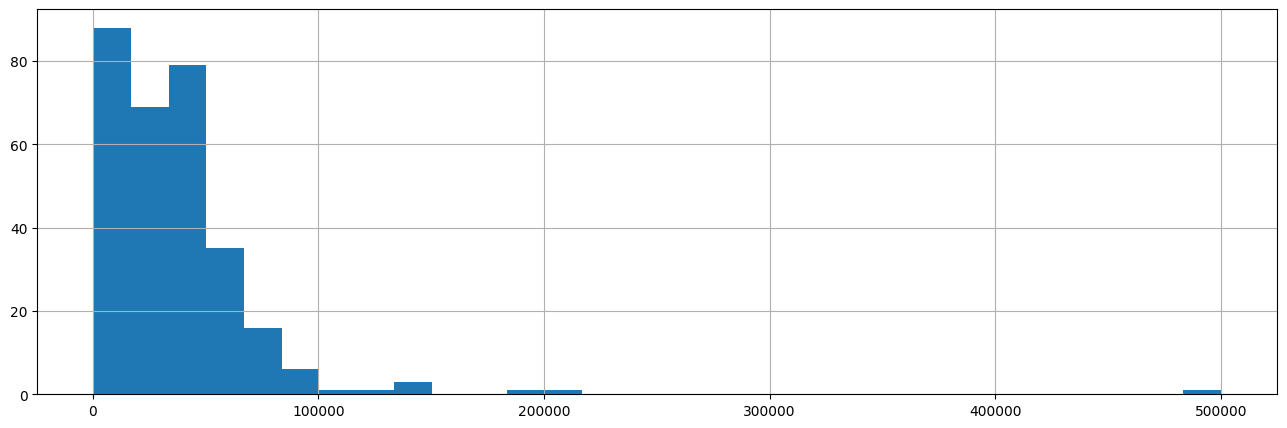

In [167]:
plt.figure(figsize=(16,5))
df_car_data.Kms_Driven.hist(bins=30)

In [563]:
# отделяем данные от нашего предсказываемого параметра
# делим на обучающую и тестовую выборки в пропорции 80/20 и фиксируем рандомайзер
df_car_data_for_model_params = df_car_data.drop(columns='Selling_Price')
df_car_data_for_model_target = df_car_data.Selling_Price
x_train, x_test, y_train, y_test = train_test_split(df_car_data_for_model_params,df_car_data_for_model_target, test_size=0.2, random_state=2)

In [564]:
x_train_orig.shape, y_train.shape, x_test_orig.shape, y_test.shape

((240, 7), (240,), (61, 7), (61,))

In [565]:
str(round(x_train_orig.shape[0] * 100 /df_car_data.shape[0],2))+'%'

'79.73%'

In [566]:
# тк я в классах и пайплайнах пока не силен, код честно стащил из твоего разбора
from sklearn.base import BaseEstimator, TransformerMixin

In [567]:
# наш новый класс наследуется от классов библиотеки sklearn - BaseEstimator и TransformerMixin
# BaseEstimator - класс для всех оценщиков библиотеки (пока ничего не понятно ))), чтоб были доступны методы Fit | Pregict
# TransformerMixin - класс дя всех трансформаторов библиотеки (еще интересней и непонятней), те чтоб в пайплайне был доступен метод Transform

class DataPipeline(BaseEstimator, TransformerMixin):
# метод для создания копии объекта нашего класса типа 'x = DataPipeline()'
# Тут мы создаем переменные внутри класса для дальнейшей обработки
# Kms_Driven_median - переменная для хранения медианного значения
# Kms_Driven_max - переменная для хранения максимальной скорости
# del_cols - список колонок, которые нужно удалить из датасета перед обучением
    def __init__(self):
        """Параметры класса"""
        self.Kms_Driven_median = None
        self.Kms_Driven_max = None  
        self.del_cols = None      
# Тут мы наполняем наши переменные данными
# Этот метод применяем для обучающей выборки. С помощью него мы наполняем переменные класса значениями
# Kms_Driven_max = 300000 (по гистограмме основные данные по данному показателю в пределях 200 000км. Взял с запасом 300 000
# Пока закомментил удаление столбцов тк перевел их в цисловые значения. Вроде для регрессии это применимо
# ругался из-за того что тип float64 в будущих релизах поддерживатья не будет. применил astype(int)
    def fit(self, df, y=None):
        self.Kms_Driven_max = 300000
        self.Kms_Driven_median = df['Kms_Driven'].median().astype(int)
        self.del_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

        return self
        
# Тутова мы начинаем обучающую выборку модифицировать на основе расчитанных переменных
# Все значения пробега выше 300 000 мы заменяем медианой
# Если есть столбец с названиями машин - удаляем. Но я его удалил ранее
# Удаляем столбцы с категориальными данными. Но я их перевел в численные. Пробую оставить 
    def transform(self, df, y=None):
        df.loc[df['Kms_Driven'] > self.Kms_Driven_max, 'Kms_Driven'] = self.Kms_Driven_median


        # if 'Car_Name' in df.columns:
        #     df.drop(columns='Car_Name', inplace=True)

        for col in self.del_cols:
            if col in df.columns:
                df.drop(columns=col, inplace=True)
  
        return df

In [568]:
# Тут мы собственно создаем сам пайплайн
# прогоняем наши обучающую и тестовую выборки и добавляем в пайплайт стандартизацию StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(
    DataPipeline(),
    StandardScaler()
)

X_train = pipe.fit_transform(x_train)
X_test = pipe.transform(x_test)

In [569]:
# НАУЧИМ ЭТУ ЖЕЛЕЗЯКУ

In [570]:
# достаем метрики (RMSE и R2) и модельку из библиотеки sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [571]:
# копируем модель и обучаем на наших данных
lr = LinearRegression()
lr.fit(x_train, y_train)

# дальше предсказываем на тренировочной и тестовой выборках
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [572]:
# судя по показателям модель достаточно точно предсказывает
# коэф.детерминации близок к 1. Это говорит о том что достаточная большая часть дисперсии объясняется нашей моделью
# по RMSE сразу так не скажешь конечно но цифра очень маленькая
print('Train R2', lr.score(x_train, y_train))
print('Test R2', lr.score(x_test, y_test))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Train R2 0.854384101553834
Test R2 0.847539968247679
Train RMSE: 2.004954850059607
Test RMSE: 1.6733664035226876


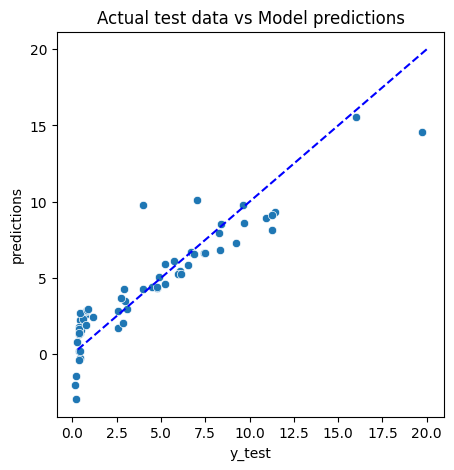

In [573]:
# ну и конечно разброс значений
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=pred_test);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions')
plt.plot([0.3,20],[0.3,20], linestyle='--', color='b')

In [574]:
# Это метрики если в датафрейме заменить категориальные признаки на числовые
# Train R2 0.8886085109547299
# Test R2 0.8448075136791757
# Train RMSE: 1.7535825082037972
# Test RMSE: 1.688295208333177

# Это метрики если в датафрейме удалить категориальные признаки
# Train R2 0.854384101553834
# Test R2 0.847539968247679
# Train RMSE: 2.004954850059607
# Test RMSE: 1.6733664035226876

# В итоге получается что замена признаков на числовые значения лучше для качества модели
# Пайплайны и классы - штуки конечно удобные но это еще больше придется погружаться в тему программирования.

In [575]:
# так и быть, попробуем еще полином применить в модели чтоб прям по максимуму

In [576]:
from sklearn.preprocessing import PolynomialFeatures

In [577]:
# преобразуем наши выборки с добавлением параметров
pipe_poly = make_pipeline(
    DataPipeline(),
    PolynomialFeatures(degree=3),
    StandardScaler()
)

X_train_poly = pipe_poly.fit_transform(x_train)
X_test_poly = pipe_poly.transform(x_test)

In [578]:
X_train_poly.shape, X_test_poly.shape

((240, 35), (61, 35))

In [579]:
# количество признаков увеличилось с 4 до 15 при полиноме 2й степени

In [580]:
# копируем модель и обучаем на наших данных c полиномом
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# дальше предсказываем на тренировочной и тестовой выборках
pred_train_poly = lr_poly.predict(X_train_poly)
pred_test_poly = lr_poly.predict(X_test_poly)

In [581]:
pred_test_poly.shape, y_test.shape

((61,), (61,))

In [582]:
print('Train R2', lr_poly.score(X_train_poly, y_train))
print('Test R2', lr_poly.score(X_test_poly, y_test))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_poly)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_poly)))

Train R2 0.9776102383475347
Test R2 0.9565795067289165
Train RMSE: 0.7861853290600054
Test RMSE: 0.8930184236870555


Text(0.5, 1.0, 'Actual test data vs Model predictions with polynomial function')

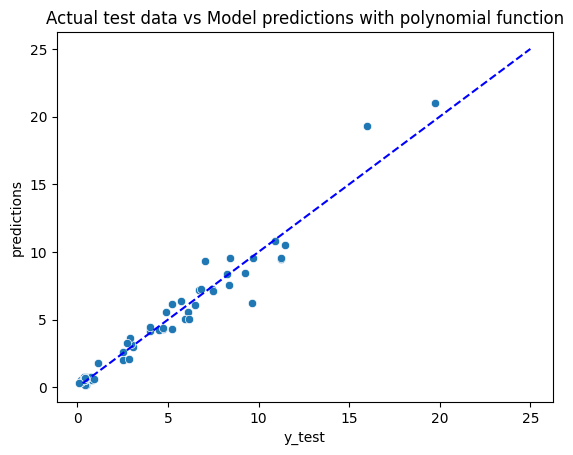

In [586]:
# ну и конечно разброс значений

#fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=y_test, y=pred_test_poly)
plt.plot([0.3,25],[0.3,25], linestyle='--', color='b')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions with polynomial function')

In [584]:
# Для полинома 2й степени
# Train R2 0.9696499771124154
# Test R2 0.9624430898382995
# Train RMSE: 0.9153342466112643
# Test RMSE: 0.8305350593527232

# Для полинома 3й степени
# Train R2 0.9776102383475347
# Test R2 0.9565795067289165
# Train RMSE: 0.7861853290600054
# Test RMSE: 0.8930184236870555

In [585]:
 # если удалить категориальные признаки, то их увеличение для полинома 1-2-3 степеней  = 5- > 15 - > 35
 # если не удалять категориальные признаки, то их увеличение для полинома 1-2-3 степеней  = 8- > 36 - > 120

In [ ]:
# ОБЩИЕ ВЫВОДЫ

# с одной стороны для регрессии перевод категориальных признаков в числовые пошел на пользу
# Но при увеличении признаков почему то у полиномиальной функции появляются очень сильные выбросы
# В итоге компросимом стало уменьшение признаков с применением полинома 2-3 степеней